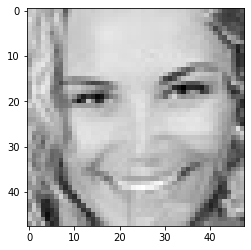

In [17]:
# Imports
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

# Testing model
CNN_model = tf.keras.models.load_model('CNNClassifier40.model')
MLP_model = tf.keras.models.load_model('MLPClassifier.model')

# Location of data
DATADIR = "Happy_Sad/test"
CATEGORIES = ["happy", "sad"]

# Checking file path
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to test happy or sad dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [18]:
IMG_SIZE = 48

# Proccessing data function
def create_training_data(direc, categories):
    temp_data = []                             # Temporary array
    for category in categories:                # For both happy and sad data
        path = os.path.join(direc, category)   # Find file path
        class_num = CATEGORIES.index(category) # Determine image class happy or sad/ 1 or 0
        for img in os.listdir(path):    # Loop through images
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Read in grey scale image
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))               # Resize image
                temp_data.append([new_array, class_num])                              # Append to temporary array
            except Exception as e:                                                    # Check for issue
                print('Image failed to process: ' + e)
    return temp_data                                                                  # Return processed data set
            
test_data = create_training_data(DATADIR, CATEGORIES)
print(len(test_data))                                                       

2992


In [19]:
import random

random.shuffle(test_data)  # Shuffle data to prevent bias

for sample in test_data[:10]:
    print(sample[1])

1
0
1
0
0
1
1
0
0
1


In [20]:
X = [] # Image arrays
y = [] # Image classification

for features, label in test_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Shape data
y = np.asarray(y)

Sad


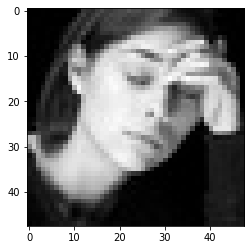

In [21]:
TEST_ITEM = 16                                     # Visualise prediction item

print('Happy' if y[TEST_ITEM] == 0 else 'Sad')    # Print category    

plt.imshow(test_data[TEST_ITEM][0], cmap="gray")  # Display Image
plt.show()

In [22]:
CNN_prediction = CNN_model.predict([X])[TEST_ITEM] # Get prediciton
print('CNN: Sad' if CNN_prediction >= 0.5 else 'CNN: Happy') # Print prediciton
MLP_prediction = MLP_model.predict([X])[TEST_ITEM] # Get prediciton
print('MLP: Sad' if MLP_prediction >= 0.5 else 'MLP: Happy') # Print prediciton

CNN: Sad
MLP: Sad


In [23]:
evaluation_CNN = CNN_model.evaluate(X, y) # Evaluate accuracy and loss on entire dataset
evaluation_MLP = MLP_model.evaluate(X, y) 

94/94 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.6949


In [24]:
with open('submission_file.csv','w') as f: # Generate csv file for categories agaisnt predicitons
    f.write('Category,CNN Prediciton,MLP Prediction\n')
            
with open('submission_file.csv','a') as f: # Predict and store into csv file
    for data in test_data:
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(-1, IMG_SIZE,IMG_SIZE, 1)
        CNN_model_out = CNN_model.predict([data])
        MLP_model_out = MLP_model.predict([data])
        f.write('{},{},{}\n'.format(img_num,CNN_model_out,MLP_model_out))